# Animals10 Classification with AlexNet

In [2]:
# 1) Data generators setup (ImageDataGenerator)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
DATA_DIR = "/kaggle/input/animals10/raw-img"
IMG_SIZE = (227, 227)
BATCH_SIZE = 32
SEED = 42

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=SEED,
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=SEED,
    shuffle=False
)

NUM_CLASSES = len(train_generator.class_indices)
print("Detected classes:", train_generator.class_indices)
print("Num classes:", len(train_generator.class_indices))

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.
Detected classes: {'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}
Num classes: 10


In [3]:
# 2) AlexNet model definition (Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer
import tensorflow as tf

def build_alexnet(input_shape=(227,227,3), num_classes=10):
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))

    # Layer 1
    model.add(Conv2D(96, kernel_size=(11,11), strides=4, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=2))

    # Layer 2
    model.add(Conv2D(256, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=2))

    # Layer 3–5
    model.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=2))

    # Classifier
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

model = build_alexnet(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), num_classes=NUM_CLASSES)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1760009226.269957      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,324,746 (222.49 MB)

 Trainable params: 58,323,530 (222.49 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [4]:
# Utility: count model parameters and print size in MB
def count_params_and_size(model):
    params = model.count_params()
    size_bytes = params * 4
    size_mb = size_bytes / (1024**2)
    print(f'Total params: {params:,} ({size_mb:.2f} MB)')

count_params_and_size(model)

Total params: 58,324,746 (222.49 MB)


In [6]:
# 3) Train the model
EPOCHS = 6
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

Epoch 1/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 67s 101ms/step - accuracy: 0.4799 - loss: 1.5443 - val_accuracy: 0.3951 - val_loss: 1.8465
Epoch 2/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 55s 84ms/step - accuracy: 0.5553 - loss: 1.3128 - val_accuracy: 0.5120 - val_loss: 1.4557
Epoch 3/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 58s 88ms/step - accuracy: 0.6201 - loss: 1.1386 - val_accuracy: 0.4574 - val_loss: 1.6304
Epoch 4/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 60s 92ms/step - accuracy: 0.6615 - loss: 0.9995 - val_accuracy: 0.6281 - val_loss: 1.1570
Epoch 5/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step - accuracy: 0.7004 - loss: 0.8816 - val_accuracy: 0.6175 - val_loss: 1.1307
Epoch 6/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 56s 85ms/step - accuracy: 0.7387 - loss: 0.7714 - val_accuracy: 0.5807 - val_loss: 1.2571


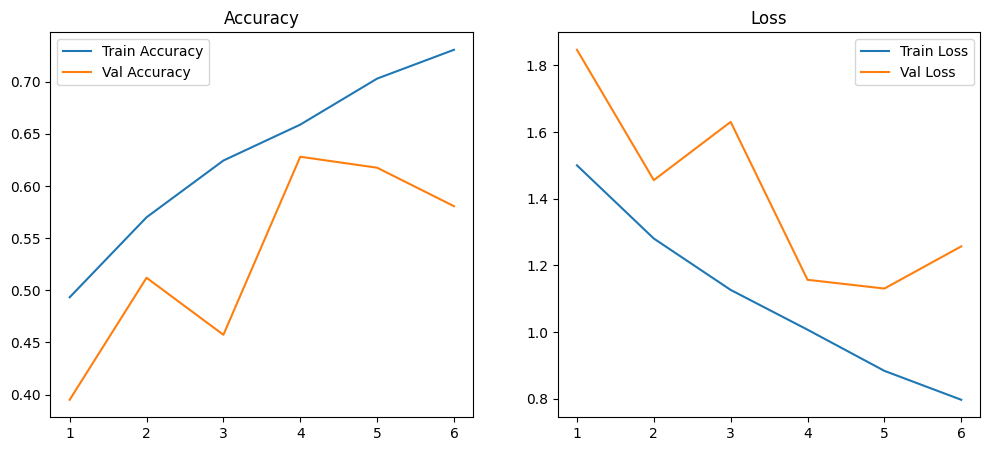

Validation samples: 5232 Batch size: 32 Steps: 164
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step


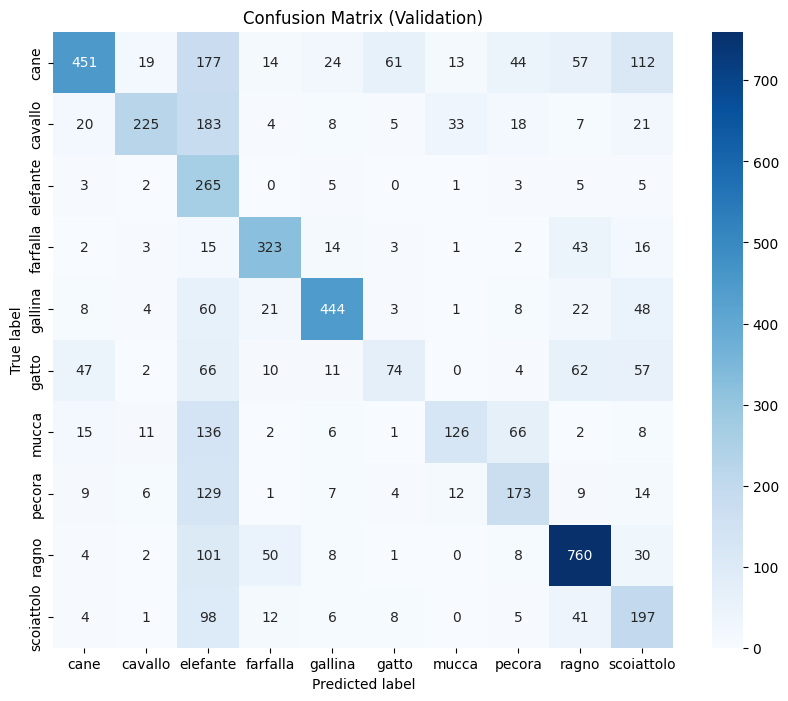

Classification report:
               precision    recall  f1-score   support

        cane     0.8011    0.4640    0.5876       972
     cavallo     0.8182    0.4294    0.5632       524
    elefante     0.2154    0.9170    0.3489       289
    farfalla     0.7391    0.7654    0.7520       422
     gallina     0.8330    0.7173    0.7708       619
       gatto     0.4625    0.2222    0.3002       333
       mucca     0.6738    0.3378    0.4500       373
      pecora     0.5227    0.4753    0.4978       364
       ragno     0.7540    0.7884    0.7708       964
  scoiattolo     0.3878    0.5296    0.4477       372

    accuracy                         0.5807      5232
   macro avg     0.6208    0.5646    0.5489      5232
weighted avg     0.6812    0.5807    0.5964      5232

Accuracy: 0.5807  Precision: 0.6812  Recall: 0.5807  F1: 0.5964


In [7]:
# 4) Evaluation: plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
import seaborn as sns
import numpy as np

acc = history.history.get('accuracy', [])
val_acc = history.history.get('val_accuracy', [])
loss = history.history.get('loss', [])
val_loss = history.history.get('val_loss', [])
epochs_range = range(1, len(acc)+1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

val_steps = int(np.ceil(val_generator.samples / val_generator.batch_size))
print('Validation samples:', val_generator.samples, 'Batch size:', val_generator.batch_size, 'Steps:', val_steps)

y_pred_probs = model.predict(val_generator, steps=val_steps, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = val_generator.classes[:len(y_pred)]  # ensure same length

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
class_names = list(train_generator.class_indices.keys())
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix (Validation)')
plt.show()

report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print('Classification report:\n', report)

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
accuracy = np.mean(y_pred == y_true)
print(f'Accuracy: {accuracy:.4f}  Precision: {precision:.4f}  Recall: {recall:.4f}  F1: {f1:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


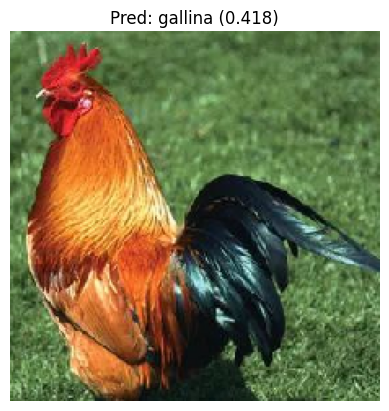

In [18]:
# 5) Predict a random image from dataset (visual check)
import os
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing import image

img = image.load_img('../input/images/Lab4/Rooster.png', target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
inp = np.expand_dims(img_array, axis=0)
probs = model.predict(inp)
pred_idx = np.argmax(probs, axis=1)[0]
pred_class = class_names[pred_idx]
conf = float(np.max(probs))
plt.imshow(img)
plt.axis('off')
plt.title(f'Pred: {pred_class} ({conf:.3f})')
plt.show()

In [25]:
# 6) Batch classify random subset of images and save CSV results
import pandas as pd

NUM_IMAGES = 1024 
OUTPUT_CSV = '/kaggle/working/classification_results.csv'

all_images = []
for cls in os.listdir(DATA_DIR):
    cls_dir = os.path.join(DATA_DIR, cls)
    if os.path.isdir(cls_dir):
        for fn in os.listdir(cls_dir):
            if fn.lower().endswith(('.jpg','.jpeg','.png')):
                all_images.append((os.path.join(cls_dir, fn), cls))

# Random sample
if NUM_IMAGES > len(all_images):
    NUM_IMAGES = len(all_images)
sampled = random.sample(all_images, NUM_IMAGES)

# Batch predict
results = []
BATCH = 128
for i in range(0, NUM_IMAGES, BATCH):
    batch = sampled[i:i+BATCH]
    batch_imgs = []
    for p, true_cls in batch:
        img = image.load_img(p, target_size=IMG_SIZE)
        arr = image.img_to_array(img) / 255.0
        batch_imgs.append(arr)
    batch_array = np.array(batch_imgs)
    preds = model.predict(batch_array)
    pred_idxs = np.argmax(preds, axis=1)
    for (p, true_cls), idx in zip(batch, pred_idxs):
        results.append([p, true_cls, class_names[idx]])

df = pd.DataFrame(results, columns=['file_path', 'true_class', 'predicted_class'])
df.to_csv(OUTPUT_CSV, index=False)
print('Saved results to', OUTPUT_CSV)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Saved results to /kaggle/working/classification_results.csv


In [26]:
#7)Optimized AlexNet variant and comparison
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

def build_alexnet_small(input_shape=(227,227,3), num_classes=10):
    inp = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=11, strides=4, activation='relu')(inp)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=3, strides=2)(x)
    x = Conv2D(64, kernel_size=5, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=3, strides=2)(x)
    x = Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=3, strides=2)(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    out = Dense(num_classes, activation='softmax')(x)
    return Model(inputs=inp, outputs=out)

small_model = build_alexnet_small(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), num_classes=NUM_CLASSES)
def params_mb(m):
    p = m.count_params()
    return p, p*4/(1024**2)

orig_params = model.count_params()
small_params = small_model.count_params()
print(f'Original AlexNet params: {orig_params:,} ({orig_params*4/(1024**2):.2f} MB)')
print(f'Small AlexNet params   : {small_params:,} ({small_params*4/(1024**2):.2f} MB)')

Original AlexNet params: 58,324,746 (222.49 MB)
Small AlexNet params   : 6,212,298 (23.70 MB)


In [27]:
import time
SAMPLE_N = 64
sampled_paths = [p for p,_ in sampled[:SAMPLE_N]]
sample_imgs = []
for p in sampled_paths:
    img = image.load_img(p, target_size=IMG_SIZE)
    arr = image.img_to_array(img) / 255.0
    sample_imgs.append(arr)
sample_array = np.array(sample_imgs)

_ = model.predict(sample_array[:8])
_ = small_model.predict(sample_array[:8])

t0 = time.time()
_ = model.predict(sample_array, batch_size=16)
t1 = time.time()
orig_time_per = (t1 - t0) / sample_array.shape[0]

t2 = time.time()
_ = small_model.predict(sample_array, batch_size=16)
t3 = time.time()
small_time_per = (t3 - t2) / sample_array.shape[0]

print(f'Original model time per image: {orig_time_per*1000:.2f} ms')
print(f'Small model time per image   : {small_time_per*1000:.2f} ms')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step 
Original model time per image: 7.87 ms
Small model time per image   : 10.91 ms
